In [3]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
df = pd.read_csv('player_comparison.csv')
df

,player_id,prev year,next year,class transition,type,prev conf,next conf,prev BB%,next BB%,prev K%,next K%,prev OBP,next OBP,prev SLG,next SLG,prev OPS,next OPS
0,beck--001jor,2021,2022,2 to 3,Returning,SEC,SEC,8.3,12.5,20.8,20.9,0.336,0.391,0.523,0.595,0.859,0.986
1,burke-000bla,2023,2024,2 to 3,Returning,SEC,SEC,9.2,10.8,17.4,14.9,0.369,0.449,0.527,0.702,0.896,1.151
2,ensley000hun,2023,2024,3 to 4,Returning,SEC,SEC,10.3,10.7,18.5,19.0,0.391,0.390,0.425,0.532,0.816,0.923
3,ensley000hun,2024,2025,4 to 5,Returning,SEC,SEC,10.7,10.6,19.0,14.9,0.390,0.418,0.532,0.531,0.923,0.950
4,gilber002and,2021,2022,2 to 3,Returning,SEC,SEC,5.0,13.5,13.2,13.1,0.341,0.455,0.437,0.673,0.778,1.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,sulliv000noa,2024,2025,3 to 4,Transfer,BigS,SEC,14.5,13.7,12.1,16.5,0.453,0.475,0.613,0.645,1.066,1.120
246,hage--000col,2024,2025,3 to 4,Transfer,IVY,SEC,13.2,11.9,13.7,15.1,0.471,0.444,0.658,0.574,1.129,1.019
247,lawren001luk,2024,2025,2 to 3,Transfer,MVC,SEC,8.4,7.5,13.6,12.7,0.399,0.397,0.465,0.425,0.864,0.822
248,hensel000wya,2024,2025,4 to 5,Transfer,IVY,SEC,11.4,7.5,11.4,16.2,0.465,0.423,0.755,0.562,1.220,0.985


In [5]:
returning_plyrs = df[df['type'] == 'Returning']
transfer_plyrs = df[df['type'] == 'Transfer']
transfer_plyrs

,player_id,prev year,next year,class transition,type,prev conf,next conf,prev BB%,next BB%,prev K%,next K%,prev OBP,next OBP,prev SLG,next SLG,prev OPS,next OPS
10,claunc000tro,2021,2022,4 to 5,Transfer,P12,SEC,10.8,8.9,16.8,18.2,0.379,0.371,0.399,0.392,0.778,0.762
11,kaler-000kol,2021,2022,2 to 3,Transfer,BigW,SEC,7.9,17.6,18.3,16.6,0.376,0.376,0.435,0.324,0.810,0.699
13,rock--001dyl,2021,2022,4 to 5,Transfer,CUSA,SEC,12.3,17.5,13.7,16.5,0.432,0.468,0.516,0.641,0.948,1.109
17,lanzil000chr,2021,2022,4 to 5,Transfer,ACC,SEC,8.1,9.8,22.5,19.3,0.325,0.424,0.481,0.513,0.807,0.937
24,carlso000bro,2021,2022,4 to 5,Transfer,SoCo,SEC,13.6,10.9,17.3,23.2,0.409,0.379,0.478,0.454,0.888,0.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,sulliv000noa,2024,2025,3 to 4,Transfer,BigS,SEC,14.5,13.7,12.1,16.5,0.453,0.475,0.613,0.645,1.066,1.120
246,hage--000col,2024,2025,3 to 4,Transfer,IVY,SEC,13.2,11.9,13.7,15.1,0.471,0.444,0.658,0.574,1.129,1.019
247,lawren001luk,2024,2025,2 to 3,Transfer,MVC,SEC,8.4,7.5,13.6,12.7,0.399,0.397,0.465,0.425,0.864,0.822
248,hensel000wya,2024,2025,4 to 5,Transfer,IVY,SEC,11.4,7.5,11.4,16.2,0.465,0.423,0.755,0.562,1.220,0.985


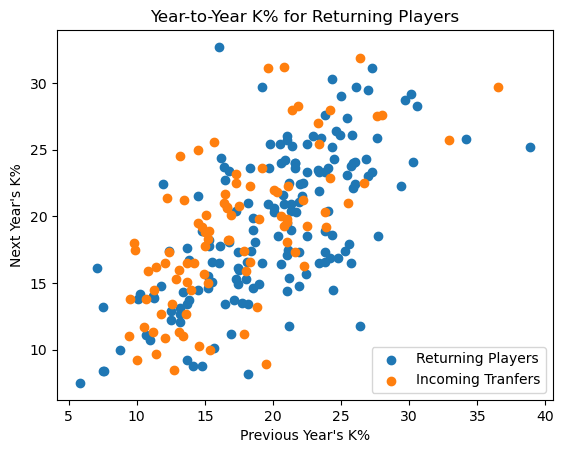

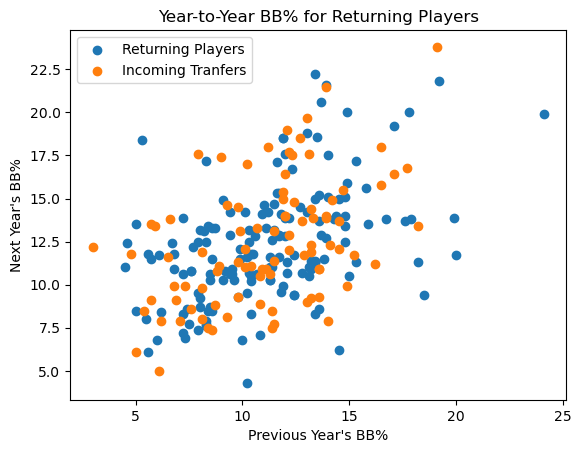

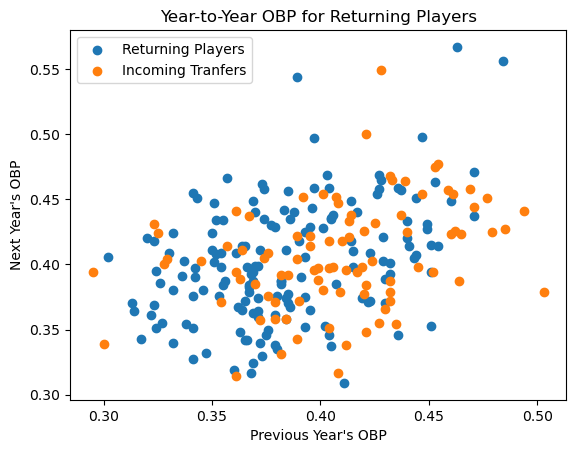

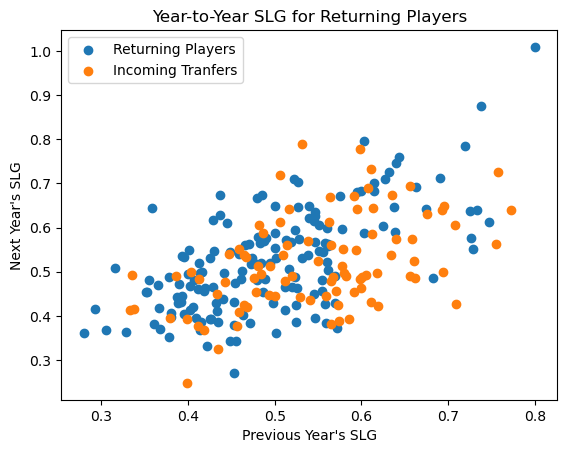

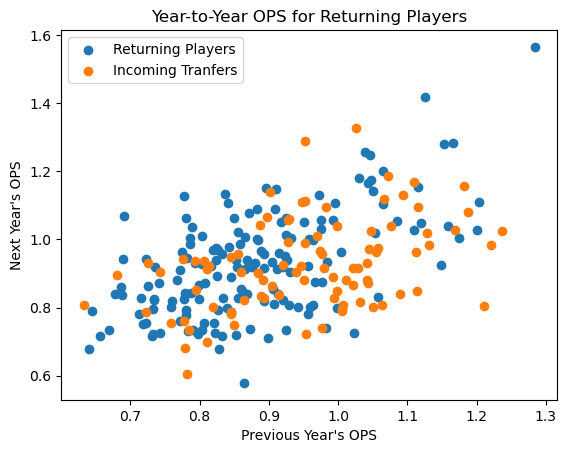

In [6]:
# Create the scatter plot
plt.scatter(returning_plyrs['prev K%'], returning_plyrs['next K%'])
plt.scatter(transfer_plyrs['prev K%'], transfer_plyrs['next K%'])

# Add labels and title
plt.xlabel("Previous Year's K%")
plt.ylabel("Next Year's K%")
plt.title("Year-to-Year K% for Returning Players")
plt.legend(['Returning Players','Incoming Tranfers'])

# Display the plot
plt.show()

# Create the scatter plot
plt.scatter(returning_plyrs['prev BB%'], returning_plyrs['next BB%'])
plt.scatter(transfer_plyrs['prev BB%'], transfer_plyrs['next BB%'])

# Add labels and title
plt.xlabel("Previous Year's BB%")
plt.ylabel("Next Year's BB%")
plt.title("Year-to-Year BB% for Returning Players")
plt.legend(['Returning Players','Incoming Tranfers'])

# Display the plot
plt.show()

# Create the scatter plot
plt.scatter(returning_plyrs['prev OBP'], returning_plyrs['next OBP'])
plt.scatter(transfer_plyrs['prev OBP'], transfer_plyrs['next OBP'])

# Add labels and title
plt.xlabel("Previous Year's OBP")
plt.ylabel("Next Year's OBP")
plt.title("Year-to-Year OBP for Returning Players")
plt.legend(['Returning Players','Incoming Tranfers'])

# Display the plot
plt.show()

# Create the scatter plot
plt.scatter(returning_plyrs['prev SLG'], returning_plyrs['next SLG'])
plt.scatter(transfer_plyrs['prev SLG'], transfer_plyrs['next SLG'])

# Add labels and title
plt.xlabel("Previous Year's SLG")
plt.ylabel("Next Year's SLG")
plt.title("Year-to-Year SLG for Returning Players")
plt.legend(['Returning Players','Incoming Tranfers'])

# Display the plot
plt.show()

# Create the scatter plot
plt.scatter(returning_plyrs['prev OPS'], returning_plyrs['next OPS'])
plt.scatter(transfer_plyrs['prev OPS'], transfer_plyrs['next OPS'])

# Add labels and title
plt.xlabel("Previous Year's OPS")
plt.ylabel("Next Year's OPS")
plt.title("Year-to-Year OPS for Returning Players")
plt.legend(['Returning Players','Incoming Tranfers'])

# Display the plot
plt.show()

In [7]:
# Split returners
ret_train, ret_test = train_test_split(returning_plyrs, test_size=0.25, random_state=1)

#Split transfers
trans_train, trans_test = train_test_split(transfer_plyrs, test_size=0.25, random_state=1)

In [8]:
# Returners
prev_ret_train = ret_train[['prev BB%']]
next_ret_train = ret_train['next BB%']

prev_ret_test = ret_test[['prev BB%']]
next_ret_test = ret_test['next BB%']

# Transfers
prev_trans_train = trans_train[['prev BB%']]
next_trans_train = trans_train['next BB%']

prev_trans_test = trans_test[['prev BB%']]
next_trans_test = trans_test['next BB%']

In [9]:
ret_model = LinearRegression().fit(prev_ret_train, next_ret_train)
trans_model = LinearRegression().fit(prev_trans_train, next_trans_train)

In [10]:
ret_pred = ret_model.predict(prev_ret_test)
trans_pred = trans_model.predict(prev_trans_test)

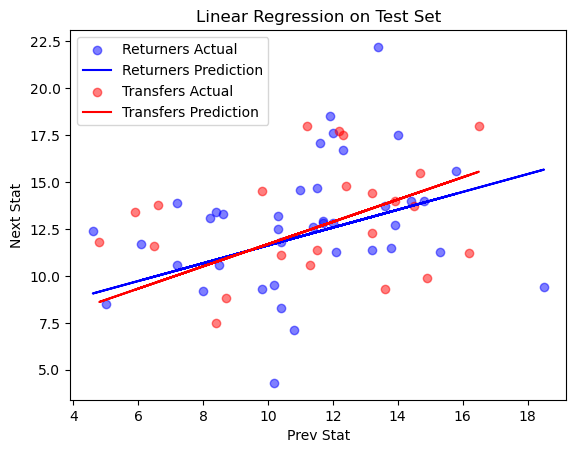

In [11]:
plt.scatter(prev_ret_test, next_ret_test, color='blue', alpha=0.5, label='Returners Actual')
plt.plot(prev_ret_test, ret_pred, color='blue', label='Returners Prediction')

plt.scatter(prev_trans_test, next_trans_test, color='red', alpha=0.5, label='Transfers Actual')
plt.plot(prev_trans_test, trans_pred, color='red', label='Transfers Prediction')

plt.xlabel("Prev Stat")
plt.ylabel("Next Stat")
plt.legend()
plt.title("Linear Regression on Test Set")
plt.show()

[0.47460309] 6.8812400686242166
Returners R²: 0.03156954903381304
Returners MAE: 2.426908446574322
[0.59317323] 5.764800323799244
Transfers R²: -0.12425802034543221
Transfers MAE: 2.681022548628546


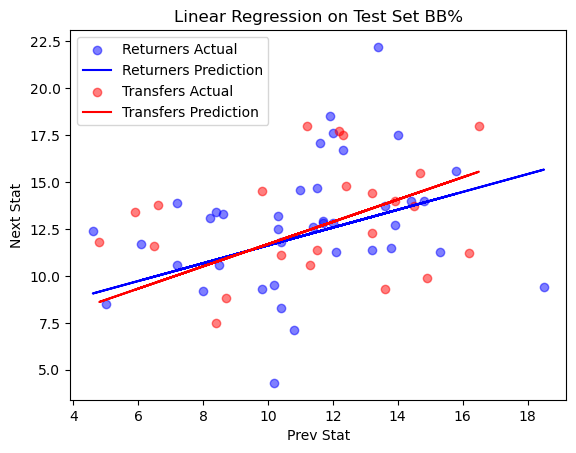

[0.68172415] 5.372595142014344
Returners R²: 0.21431478791822045
Returners MAE: 3.925262805711982
[0.69375545] 7.12607250064689
Transfers R²: 0.4963161065717224
Transfers MAE: 2.5814731323821767


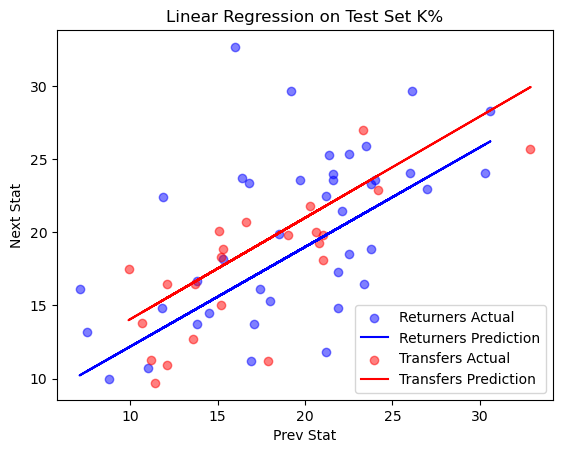

[0.45935885] 0.22389020051611724
Returners R²: 0.1906628977564796
Returners MAE: 0.029383841732423237
[0.2491967] 0.30170196566764684
Transfers R²: 0.1314639281161114
Transfers MAE: 0.023968655118077525


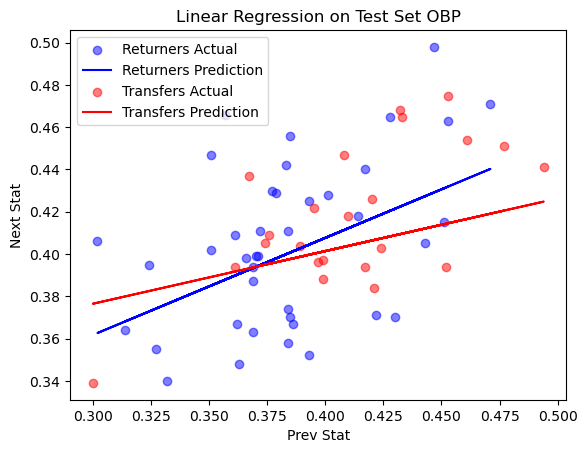

[0.75097618] 0.14955206224175555
Returners R²: 0.4899559475268762
Returners MAE: 0.056859076841318724
[0.47299594] 0.2586272899087745
Transfers R²: 0.1710863225651772
Transfers MAE: 0.07036714675657212


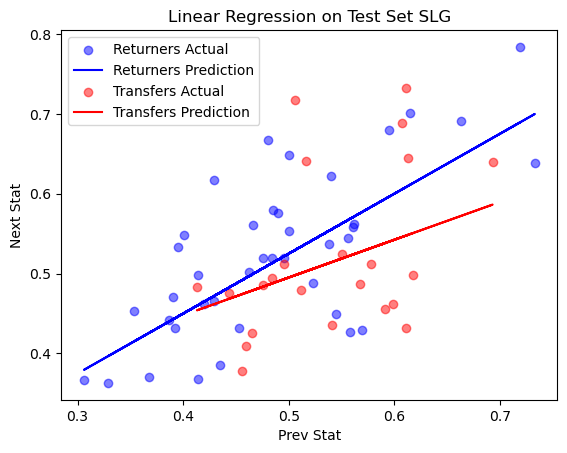

[0.71354683] 0.2943715671848457
Returners R²: 0.41352807221022636
Returners MAE: 0.08234981858643023
[0.40581018] 0.533411409744444
Transfers R²: 0.16574192008013555
Transfers MAE: 0.0832913794414897


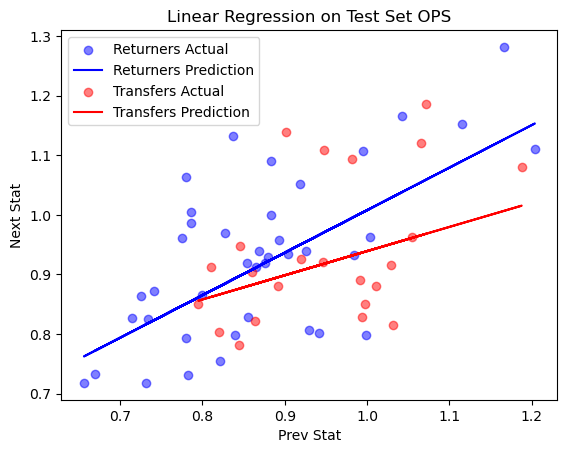

In [12]:
for stat in ['BB%','K%', 'OBP', 'SLG', 'OPS']:
    # Returners
    prev_ret_train = ret_train[['prev ' + stat]]
    next_ret_train = ret_train['next ' + stat]

    prev_ret_test = ret_test[['prev ' + stat]]
    next_ret_test = ret_test['next ' + stat]

    # Transfers
    prev_trans_train = trans_train[['prev ' + stat]]
    next_trans_train = trans_train['next ' + stat]

    prev_trans_test = trans_test[['prev ' + stat]]
    next_trans_test = trans_test['next ' + stat]

    # Models
    ret_model = LinearRegression().fit(prev_ret_train, next_ret_train)
    trans_model = LinearRegression().fit(prev_trans_train, next_trans_train)

    # Predictions
    ret_pred = ret_model.predict(prev_ret_test)
    trans_pred = trans_model.predict(prev_trans_test)

    # Metrics
    print(ret_model.coef_, ret_model.intercept_)
    print("Returners R²:", r2_score(next_ret_test, ret_pred))
    print("Returners MAE:", mean_absolute_error(next_ret_test, ret_pred))

    print(trans_model.coef_, trans_model.intercept_)
    print("Transfers R²:", r2_score(next_trans_test, trans_pred))
    print("Transfers MAE:", mean_absolute_error(next_trans_test, trans_pred))

    # Plotting
    plt.scatter(prev_ret_test, next_ret_test, color='blue', alpha=0.5, label='Returners Actual')
    plt.plot(prev_ret_test, ret_pred, color='blue', label='Returners Prediction')

    plt.scatter(prev_trans_test, next_trans_test, color='red', alpha=0.5, label='Transfers Actual')
    plt.plot(prev_trans_test, trans_pred, color='red', label='Transfers Prediction')

    plt.xlabel("Prev Stat")
    plt.ylabel("Next Stat")
    plt.legend()
    plt.title("Linear Regression on Test Set " + stat)

    plt.savefig(stat + '_regression.png')
    
    plt.show()

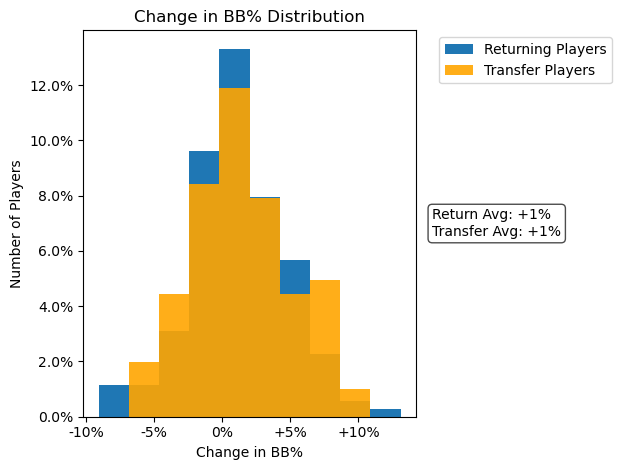

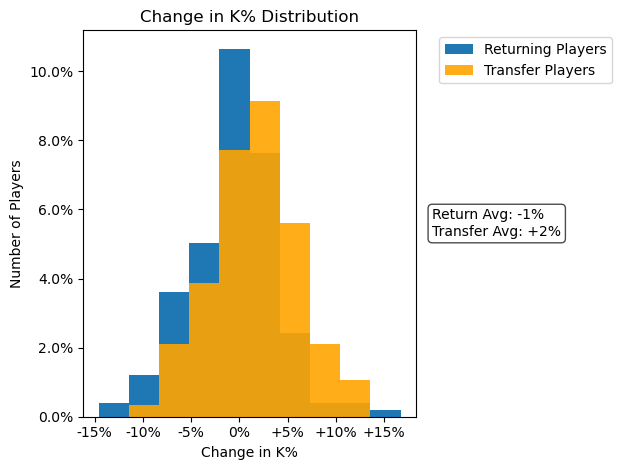

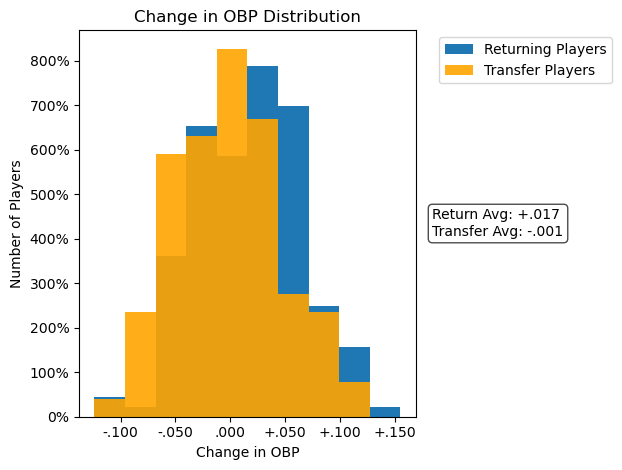

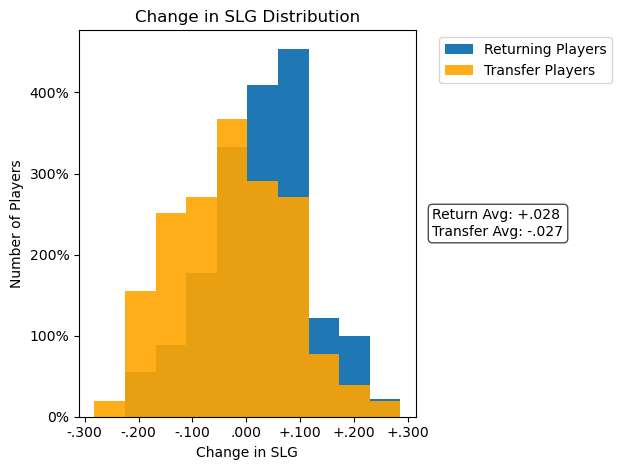

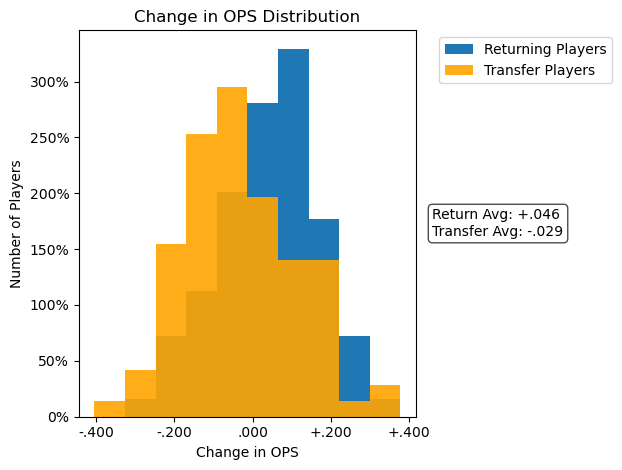

In [13]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter

# Formatter for OBP, SLG, OPS (baseball style with leading + for positives)
def baseball_format(x, pos):
    sign = '+' if x > 0 else ''
    if abs(x) >= 1:
        # For values >= 1 or <= -1
        formatted = f"{sign}{x:.3f}"
    else:
        # For values between -1 and 1, remove leading zero but keep sign
        formatted = f"{sign}{abs(x):.3f}".replace("0.", ".", 1)
        if x < 0:
            formatted = '-' + formatted.lstrip('-')
    return formatted

# Formatter for BB% and K% (percent with + sign for positives)
def percent_format(x, pos):
    sign = '+' if x > 0 else ''
    return f"{sign}{x:.0f}%"
        
for stat in ['BB%','K%','OBP','SLG','OPS']:

    r_data_delta = returning_plyrs['next ' + stat] - returning_plyrs['prev ' + stat]
    t_data_delta = transfer_plyrs['next ' + stat] - transfer_plyrs['prev ' + stat]

    # Calculate averages
    r_avg = r_data_delta.mean()
    t_avg = t_data_delta.mean()

    # Shared bin edges for both datasets
    all_data = np.concatenate([r_data_delta, t_data_delta])
    bin_edges = np.histogram_bin_edges(all_data, bins=10)

    # Plot histograms with same bins
    plt.hist(r_data_delta, density=True, bins=bin_edges, label="Returning Players")
    plt.hist(t_data_delta, density=True, bins=bin_edges, color='orange', alpha=0.9, label="Transfer Players")

    # Decide formatter
    fmt = baseball_format if stat in ['OBP','SLG','OPS'] else percent_format

    # Format average values for display
    r_avg_str = fmt(r_avg, None)
    t_avg_str = fmt(t_avg, None)

    # Place averages text in upper right corner inside the plot
    textstr = (f'Return Avg: {r_avg_str}\n'
               f'Transfer Avg: {t_avg_str}')

    # Apply correct axis formatter
    plt.gca().xaxis.set_major_formatter(FuncFormatter(fmt))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))

    # Labels and title
    plt.xlabel("Change in " + stat)
    plt.ylabel("Number of Players")
    plt.title("Change in " + stat + " Distribution")

    # Add legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

    # Add averages text outside the plot, below the legend
    plt.gca().text(1.05, 0.5, textstr, transform=plt.gca().transAxes,
                   fontsize=10, verticalalignment='center', horizontalalignment='left',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
                   
    plt.tight_layout()

    plt.savefig(stat + 'distribution.png')

    plt.show()